<a href="https://colab.research.google.com/github/atharvapatil123/ML_Practice/blob/master/Deep%20Learning/Artificial_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deep Learning at an abstract level

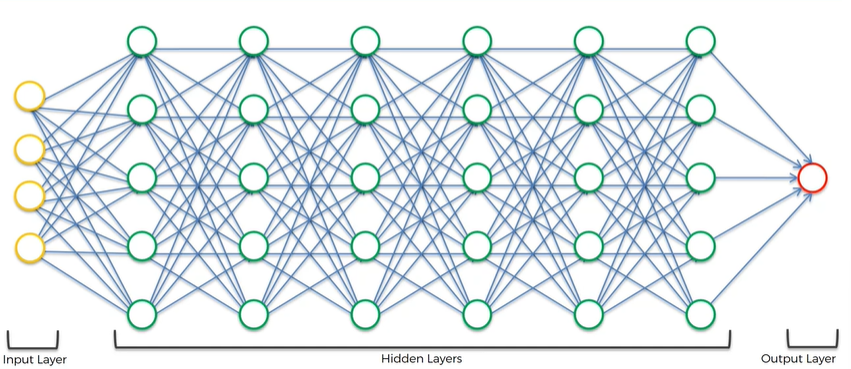

# Artificial Neural Network

## Theory

[25 Must Know Terms & concepts for Beginners in Deep Learning](https://www.analyticsvidhya.com/blog/2017/05/25-must-know-terms-concepts-for-beginners-in-deep-learning/)

### Intuition

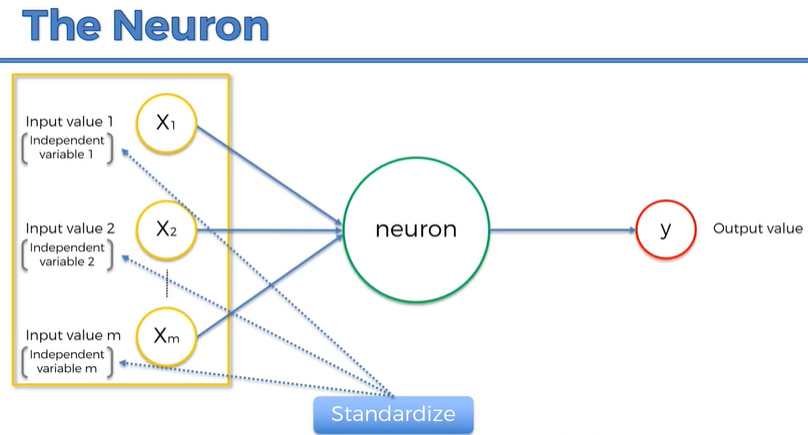

1. Each independent variable belongs to a single person

2. **Every input and output are for that single row only**

3. Synapses, i.e. weights get assigned between input signals and the hidden layer

4. Output can be continuous, binary or categorical

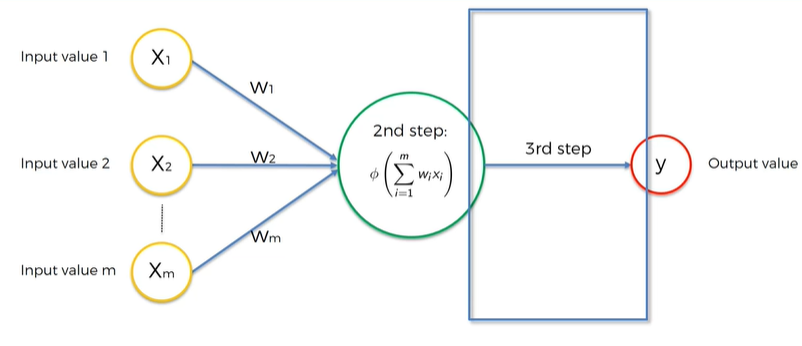

### Activation Function

1. **Threshold function:** Assign 0 if weighted sum < 0, else 1. Range = [0, 1]

2. **Sigmoid function:** Used in logistic regression. Smooth exponential curve. Tells about probability. Useful in output layers. Range = [0, 1] 

3. **Rectifier function:** Φ(x) = max(x, 0). 0 till 0, then linear after it. Range = [0, 1]

4. **Hyperbolic tangent:** Similar to sigmoid function, goes below 0. Range = [-1, 1]

Generally, we apply rectifier function at the hidden layers and sigmoid function at the output layer.

### Working



#### Single layer feed forward network or perceptron

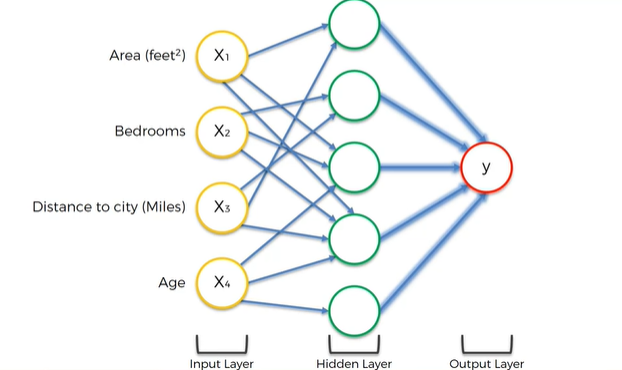

Based on a certain combinations of input parameters, the neuron triggers and sends signals to hidden layers.

#### How do neural network learns?

##### For a single row

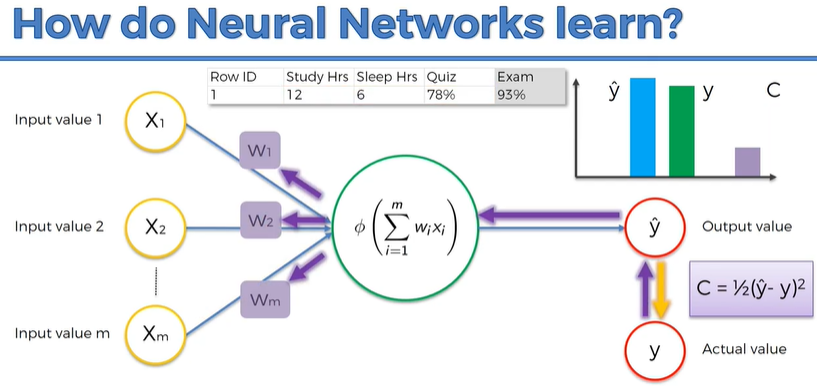

##### For mutiple rows: **Back-Propagation**

Instead of changing each weight-value after backpropagation, the algorithm knows which weight has caused the error, and alters it only

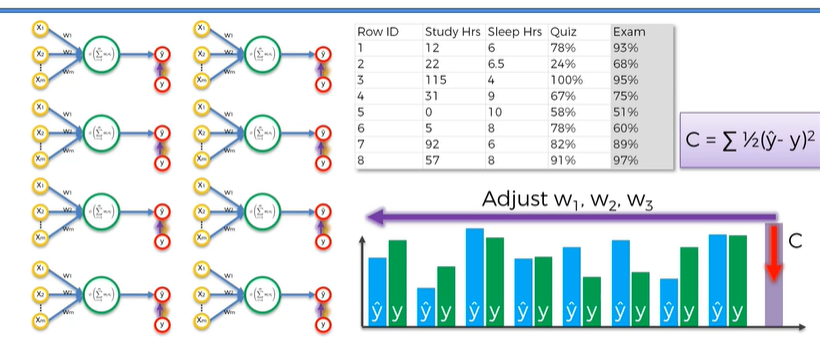

Here, we have the same cost function for each neuron.

Infact, we have a single neuron with same weights- w1, w2, w3.

### Batch Gradient Descent

**Helpful when cost function is convex, otherwise gets stuck in local optima**

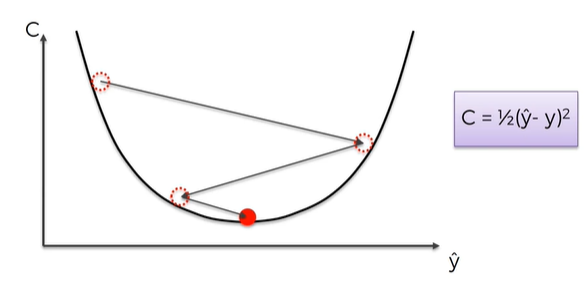

Based on slope, if -'ve, go down, and if +'ve, go up

We find the most optimal values of the weights, in order to get minimum cost value

### Stochastic Gradient Descent

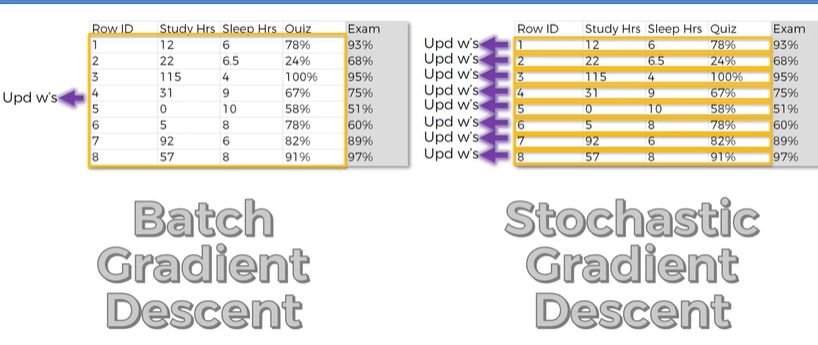

Faster then Batch G.D.

Pick rows at random

Mini-batch G.D.: Running mini batches, instead of entire batches

### Steps for ANN

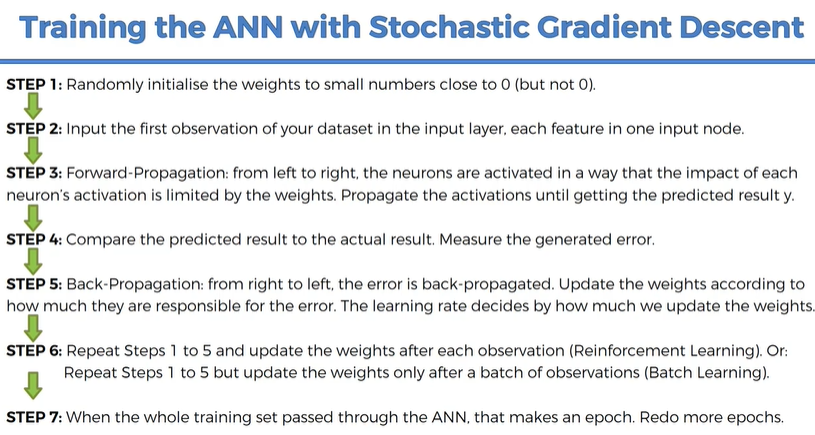

## Implementation

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
tf.__version__

'2.7.0'

### Part 1 - Data Preprocessing

#### Importing the dataset

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [ ]:
print(y)

[1 0 1 ... 1 1 0]


#### Encoding categorical data

Label Encoding the "Gender" column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X[1])

[0.0 0.0 1.0 608 0 41 1 83807.86 1 0 1 112542.58]



#### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(len(X_train[0]))

12


#### Feature Scaling (COMPULSORY FOR ANN)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  0.32472465]])

### Part 2 - Building the ANN

#### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()
print(ann)

#### Adding the input layer and the first hidden layer

In [ ]:
# Shallow Neural Network
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
# Dense function creates 'units' number of neurons in the first hidden layer
# Input layer is automatically created, with 'independent features' number of neurons
# Value of units is calculated experimentally
print(ann)

#### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

#### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid') )
# In case of non-binary output in classification, activation = 'softmax'

### Training the ANN

#### Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Stochastic Gradient Descent is used, and optimizer updates the weights
# For binary output in classification, loss = binary_crossentropy
# In case of non-binary output in classification, loss = categorical_crossentropy

#### Training the ANN on the Training set

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

### Part 4 - Making the predictions and evaluating the model

In [ ]:
x = sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])
print(ann.predict(x) > 0.5)

[[False]]


#### Predicting the Test set results

In [ ]:
y_pred = ann.predict(X_test)  > 0.5
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


#### Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1503   92]
 [ 196  209]]


0.856